## EDA

For EDA, we'll be making use of Pandas and NumPy, as well as Matplotlib and Seaborn for visual analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, we need to read in the prepared data.

In [2]:
df = pd.read_csv('./prepared_waybill_data.csv', low_memory=False)
df.shape

(68486, 14)

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68486 entries, 0 to 68485
Data columns (total 14 columns):
is_hazardous                     68486 non-null int64
car_ownership_category_code      68486 non-null object
miscellaneous_charges_dollars    68486 non-null int64
all_rail_intermodal_code         68486 non-null int64
estimated_short_line_miles       68486 non-null int64
number_of_interchanges           68486 non-null int64
number_of_articulated_units      68486 non-null int64
origin_location                  68486 non-null object
interchange_state_1              9538 non-null object
interchange_state_2              1266 non-null object
interchange_state_3              187 non-null object
interchange_state_4              7 non-null object
interchange_state_5              1 non-null object
terminal_location                68486 non-null object
dtypes: int64(6), object(8)
memory usage: 29.1 MB


In [4]:
df.head()

,is_hazardous,car_ownership_category_code,miscellaneous_charges_dollars,all_rail_intermodal_code,estimated_short_line_miles,number_of_interchanges,number_of_articulated_units,origin_location,interchange_state_1,interchange_state_2,interchange_state_3,interchange_state_4,interchange_state_5,terminal_location
0,1,P,0,1,2120,0,0,"Chicago-Gary-Kenosha, IL-IN-WI",NaN,NaN,NaN,NaN,NaN,"Los Angeles-Riverside-Orange County, CA-AZ"
1,1,P,0,9,810,0,0,"Chicago-Gary-Kenosha, IL-IN-WI",NaN,NaN,NaN,NaN,NaN,"Philadelphia-Wilmington-Atlantic City, PA-NJ-D..."
2,1,P,0,1,350,1,0,"New Orleans, LA-MS",AL,NaN,NaN,NaN,NaN,"Birmingham, AL"
3,1,P,0,9,2470,2,4,"Baton Rouge, LA-MS",IL,AB,NaN,NaN,NaN,Alberta
4,1,P,0,1,860,0,0,"Chicago-Gary-Kenosha, IL-IN-WI",NaN,NaN,NaN,NaN,NaN,"Shreveport-Bossier City, LA-AR"


Let's start by taking a look at the correlation matrix, to see if any of our numerical columns correlate with the is_hazardous column.

In [5]:
df.corr()

,is_hazardous,miscellaneous_charges_dollars,all_rail_intermodal_code,estimated_short_line_miles,number_of_interchanges,number_of_articulated_units
is_hazardous,1.000000,-0.008042,-0.175271,-0.354814,0.008080,-0.570608
miscellaneous_charges_dollars,-0.008042,1.000000,0.010225,0.009447,-0.015822,-0.004391
all_rail_intermodal_code,-0.175271,0.010225,1.000000,0.147743,0.119982,0.141289
estimated_short_line_miles,-0.354814,0.009447,0.147743,1.000000,0.208191,0.504362
number_of_interchanges,0.008080,-0.015822,0.119982,0.208191,1.000000,-0.089477
number_of_articulated_units,-0.570608,-0.004391,0.141289,0.504362,-0.089477,1.000000


There are slight negative correlations with the number of articulated units and the estimated short-line miles. The `all_rail_intermodal_code` should not actually be a numerical value, as the codes (1, 2, and 9) simply refer to whether or not the freight has been moved using multiple travel media (i.e. it traveled by ship for a time, then moved to the railway). We'll examine these values categorically in a future step.

As we discover columns that have weak predictive power, we will append them to a list of columns to drop, then we will drop them from our data at the end of our analysis.

In [6]:
drop_cols = []

Next, we'll take a look at the distribution of each data point. While some columns don't correlate with hazard, if their distrbutions differ widely between hazardous and non-hazardous freight, then we might still be able to get some segmenting power from them.

In [7]:
grouped = df.groupby('is_hazardous')

In [8]:
grouped.mean()

,miscellaneous_charges_dollars,all_rail_intermodal_code,estimated_short_line_miles,number_of_interchanges,number_of_articulated_units
is_hazardous,,,,,
0,11.42581,5.901936,1314.652630,0.157142,2.641416
1,7.93879,4.502497,761.128114,0.164063,0.400958


In [9]:
grouped.std()

,miscellaneous_charges_dollars,all_rail_intermodal_code,estimated_short_line_miles,number_of_interchanges,number_of_articulated_units
is_hazardous,,,,,
0,226.332045,3.892399,819.678226,0.420387,1.937867
1,206.821272,3.968175,625.963166,0.436034,1.201439


At a glance, we can see a few things: miscellaneous charges tend to be higher and more variant for non-hazardous shipments; estimated short-line miles are far less for hazardous frieght (meaning hazardous freight travels a smaller distance, on average); and non-hazardous freight tend to travel in articulated units more frequently than hazardous freight.

Let's visualize these with kernel density plots.

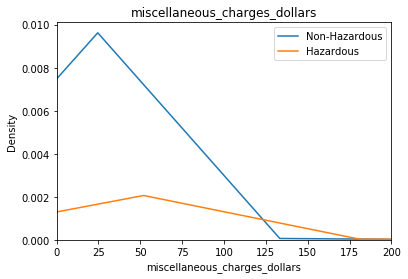

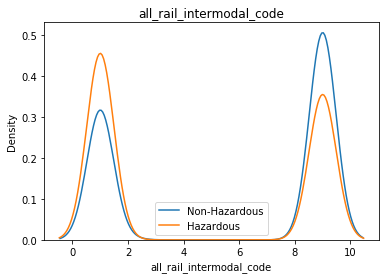

__HAZARDOUS__
9    20960
1    13106
2      177
Name: all_rail_intermodal_code, dtype: int64
__NON-HAZARDOUS__
1    19223
9    14988
2       32
Name: all_rail_intermodal_code, dtype: int64




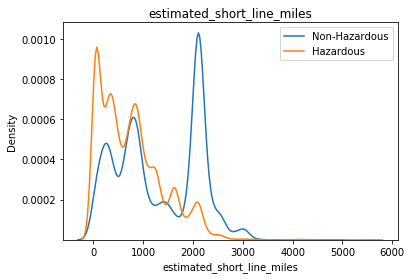

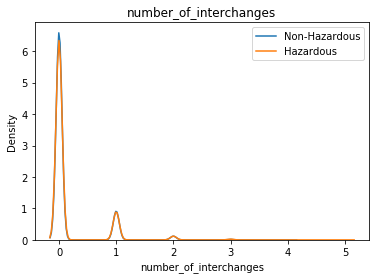

__HAZARDOUS__
0    29541
1     4099
2      530
3       70
4        3
Name: number_of_interchanges, dtype: int64
__NON-HAZARDOUS__
0    29407
1     4173
2      549
3      110
4        3
5        1
Name: number_of_interchanges, dtype: int64




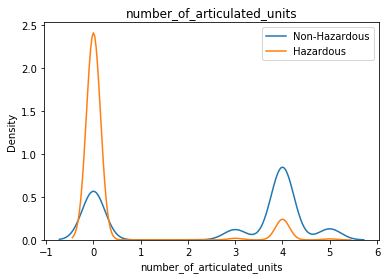

__HAZARDOUS__
4    17436
0    11660
5     2647
3     2471
2       29
Name: number_of_articulated_units, dtype: int64
__NON-HAZARDOUS__
0    30785
4     3065
3      234
5      150
2        9
Name: number_of_articulated_units, dtype: int64




In [10]:
for c in df.columns[df.dtypes!='object']:
    if c == 'is_hazardous':
        continue
    
    sns.kdeplot(df.loc[df['is_hazardous']==0, c], label='Non-Hazardous')
    sns.kdeplot(df.loc[df['is_hazardous']==1, c], label='Hazardous')
    if c == 'miscellaneous_charges_dollars':
        plt.xlim(0, 200)
    plt.title(c)
    plt.legend()
    plt.show()
    
    if c in ['all_rail_intermodal_code', 'number_of_interchanges', 'number_of_articulated_units']:
        print('__HAZARDOUS__')
        print(df.loc[df['is_hazardous']==0, c].value_counts())
        print('__NON-HAZARDOUS__')
        print(df.loc[df['is_hazardous']==1, c].value_counts())
    
    print('='*20)
    print('\n')

It seems that even though miscellaneous_charges_dollars tend to be higher, on average, for non-hazardous freight, we don't have many non-zero charges, so the data for this column will not be particualrly usefull. We'll add it to the drop list.

We can see some separability in the all rail/intermodal code. It seems that non-hazardous freight tend to have a higher likelyhood of being unidentified (code 9), so we'll keep this column for now.

As we gathered from the correlation matrix, we can see that the estimated short-line miles are shorter for hazardous freight. This could be good for our future model.

The number of interchanges seems to be the same for both types of freight, so we will drop this column.

Hazardous shipments are less likey to travel in articulated units, as we saw in the correlation matrix, so we will keep this column.

In [11]:
drop_cols.append('miscellaneous_charges_dollars')

In [13]:
drop_cols.append('number_of_interchanges')

Let's take a look at our categorical columns now.

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


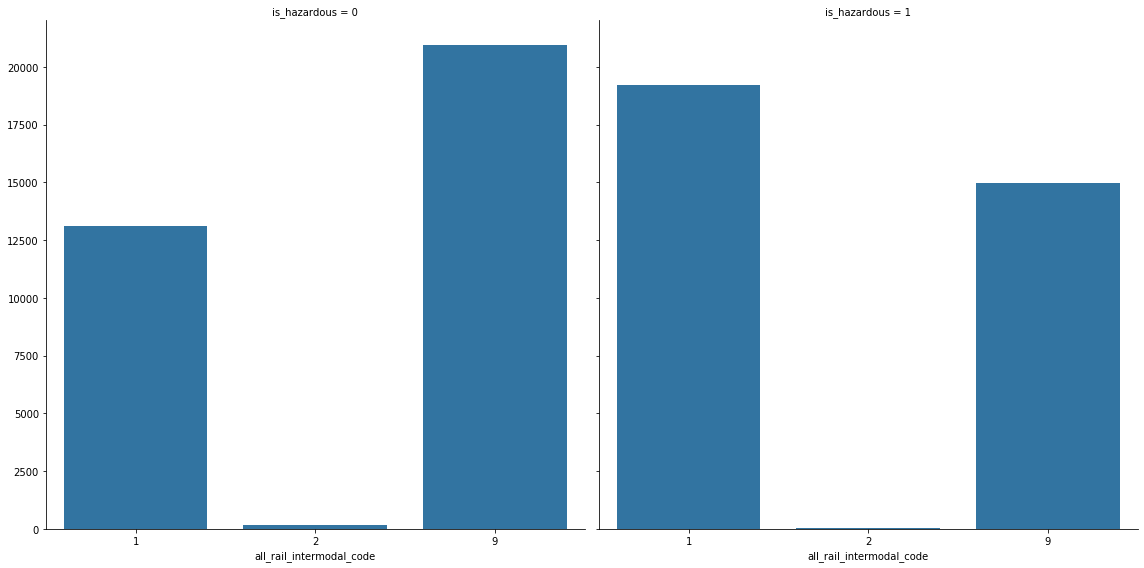

In [14]:
g = sns.FacetGrid(df, col='is_hazardous', height=8)
g.map(sns.countplot, 'all_rail_intermodal_code')

We see some evidence of separability in our all-rail/intermodal codes, so we will officially retain this column.

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


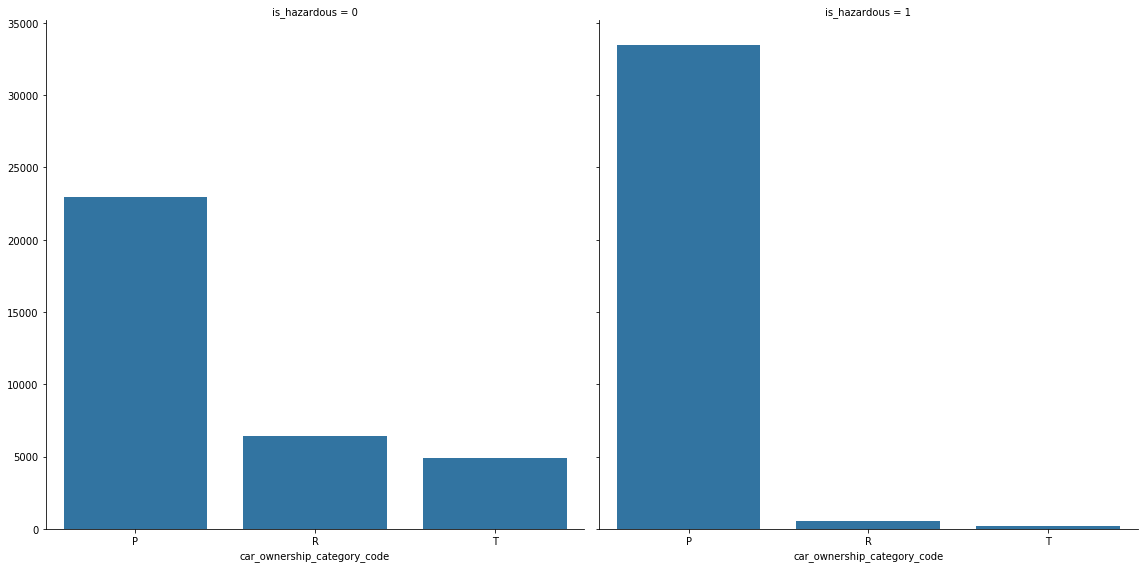

In [15]:
g = sns.FacetGrid(df, col='is_hazardous', height=8)
g.map(sns.countplot, 'car_ownership_category_code')

We see here that hazardous freight is more likely to be privately owned, so we will retain this column as well

The following plots are for the origin locations, terminal locations, and interchange states along the route. These appear to have a good amount of predictive power, as it seems that hazardous and non-hazardous freight tend to originate in separate areas, arrive in separate areas, and follow differing routes that hazardous freight.

We will likey use this data as a part of a sequence model (perhaps LSTM).

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text xticklabel objects>)

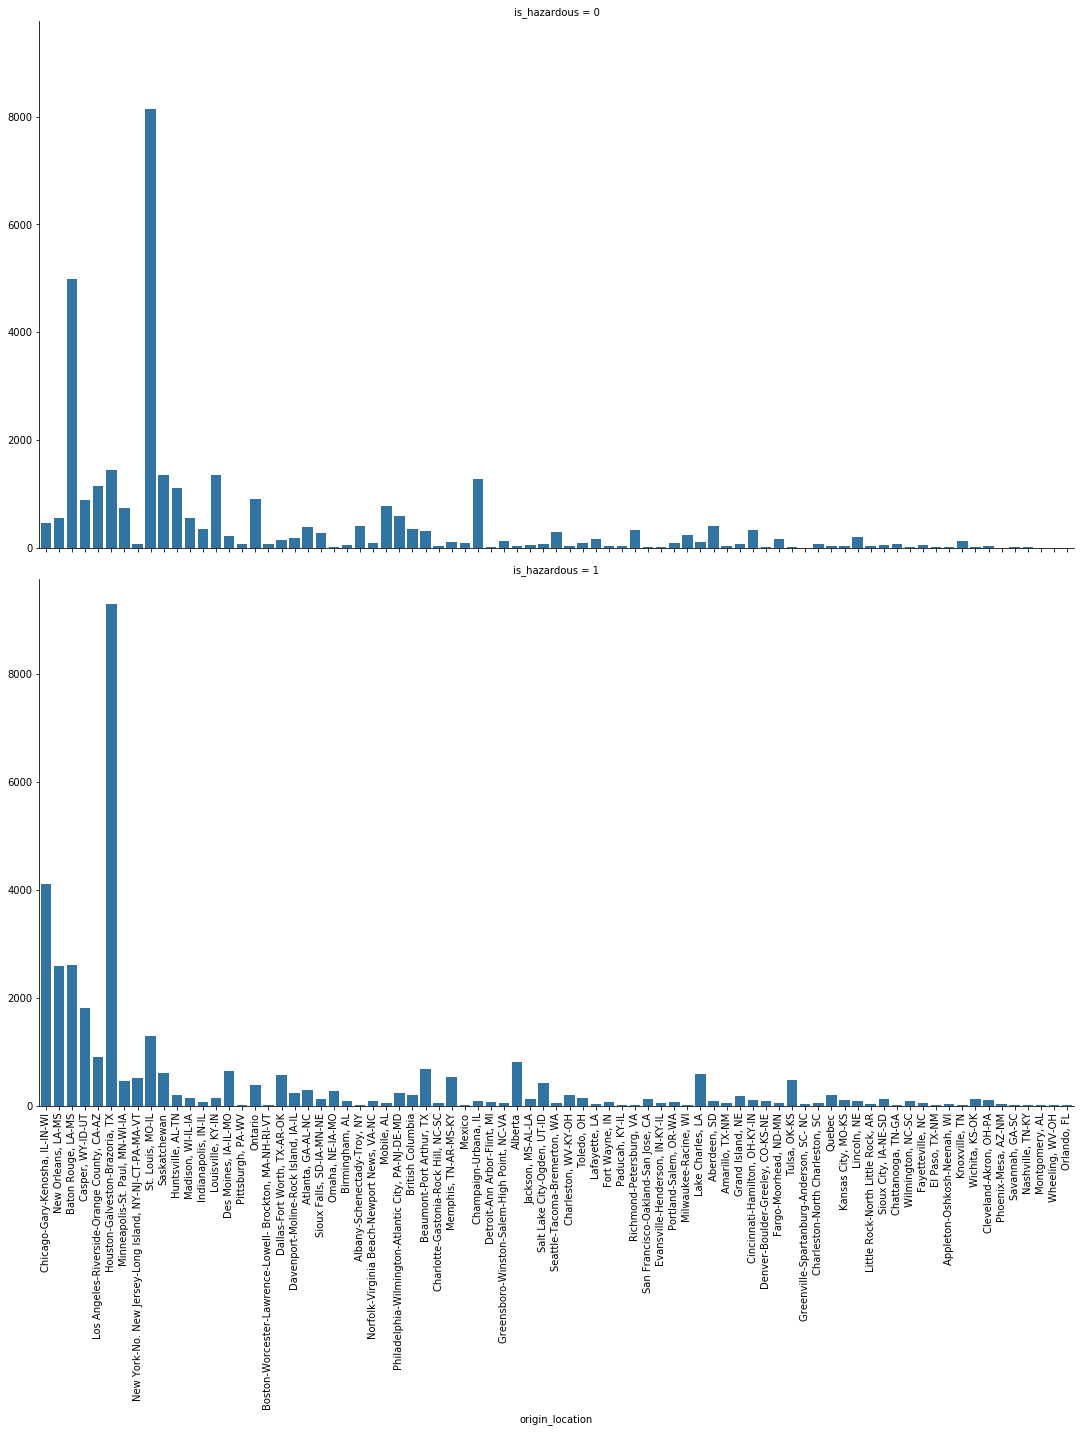

In [16]:
g = sns.FacetGrid(df, row='is_hazardous', height=8, aspect=2)
g.map(sns.countplot, 'origin_location')
plt.xticks(rotation=90)

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135]),
 <a list of 136 Text xticklabel objects>)

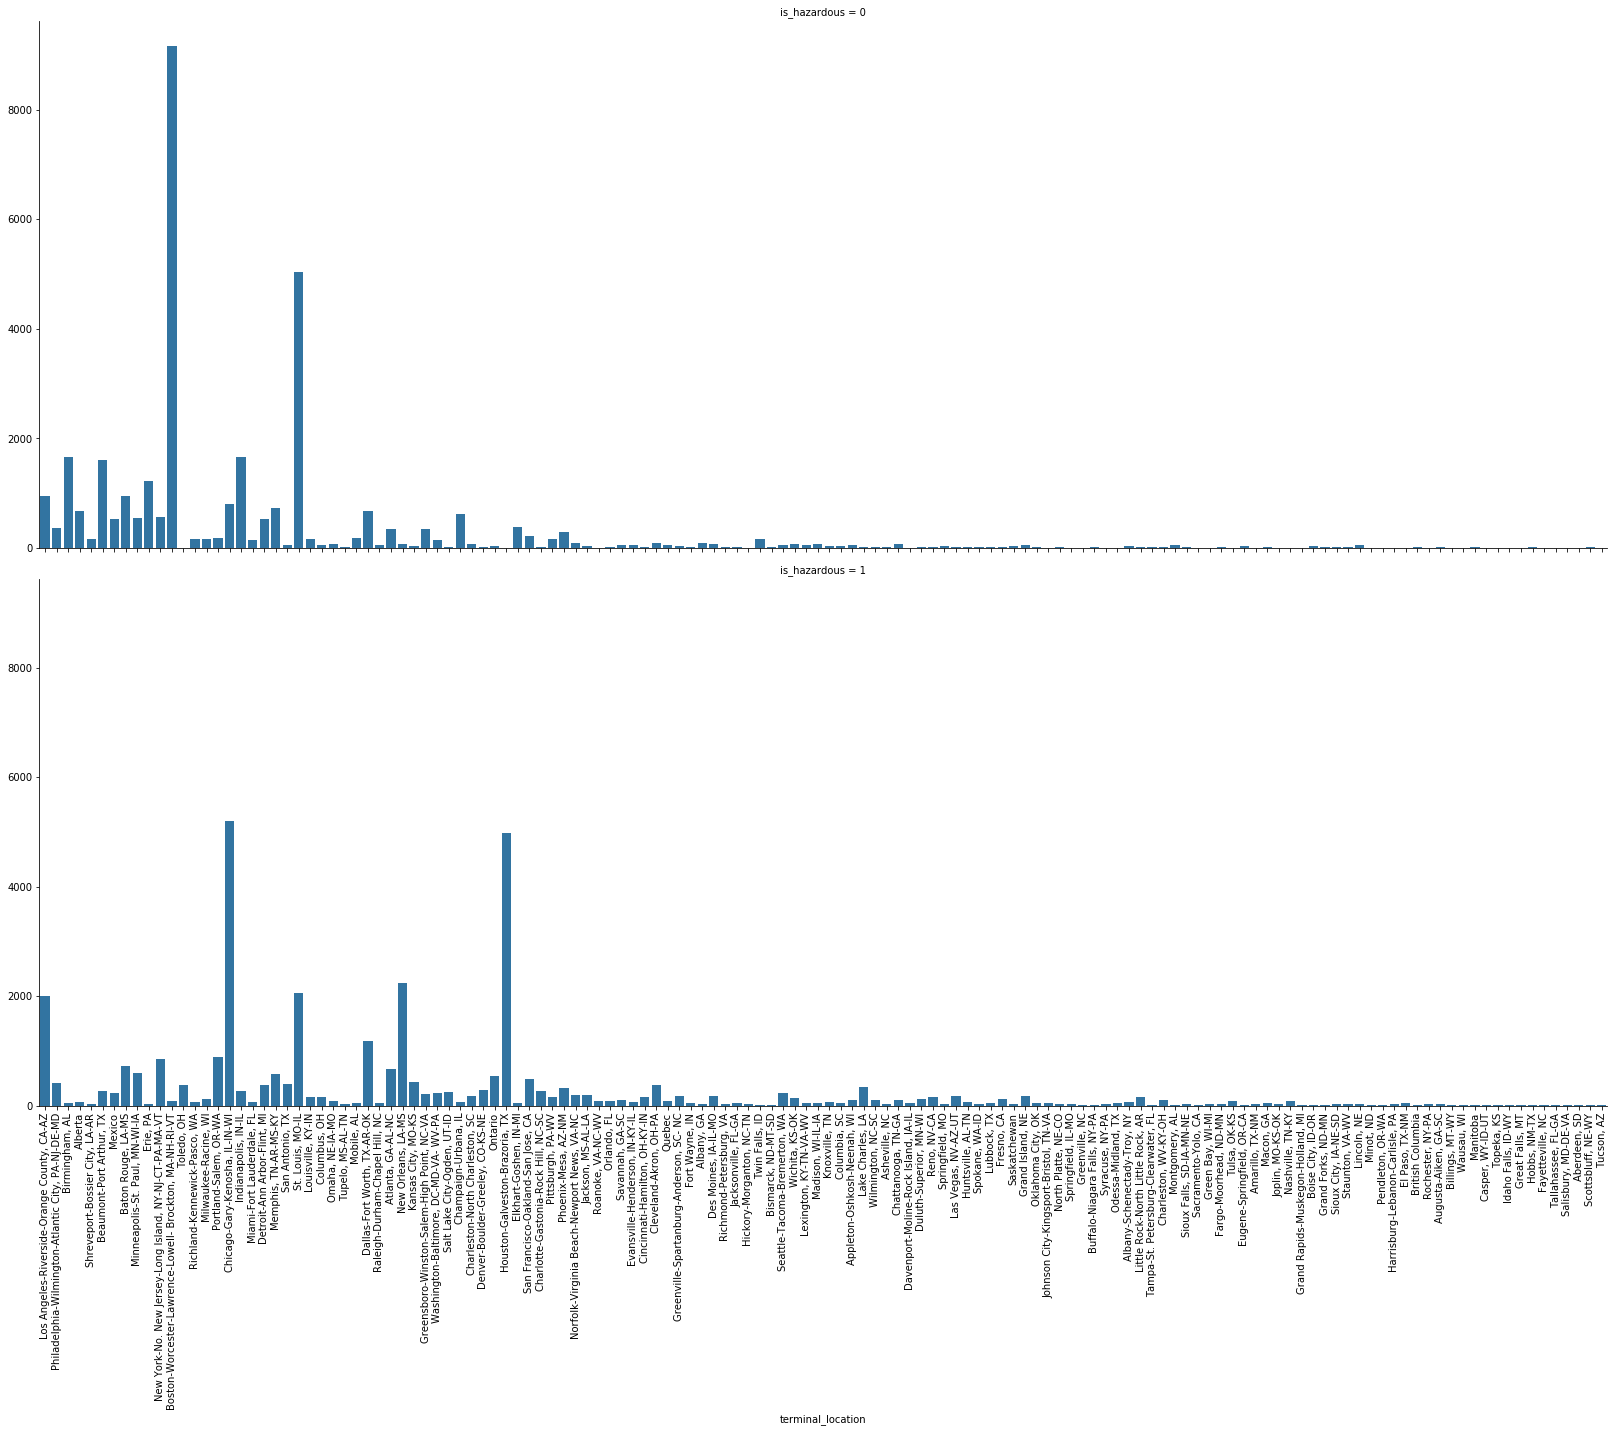

In [17]:
g = sns.FacetGrid(df, row='is_hazardous', height=8, aspect=3)
g.map(sns.countplot, 'terminal_location')
plt.xticks(rotation=90)

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

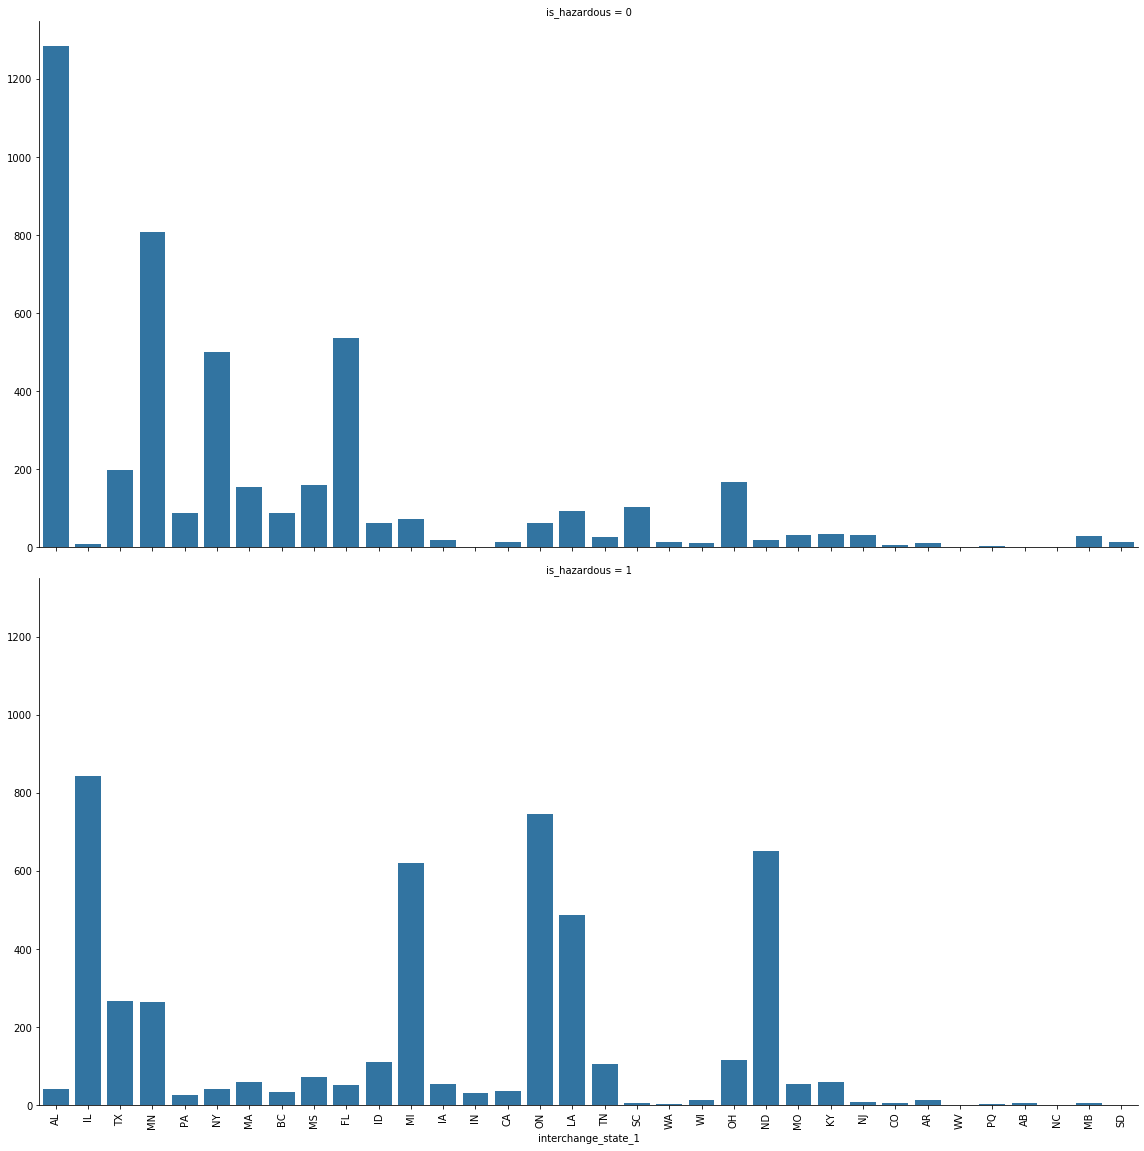

In [18]:
g = sns.FacetGrid(df, row='is_hazardous', height=8, aspect=2)
g.map(sns.countplot, 'interchange_state_1')
plt.xticks(rotation=90)

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

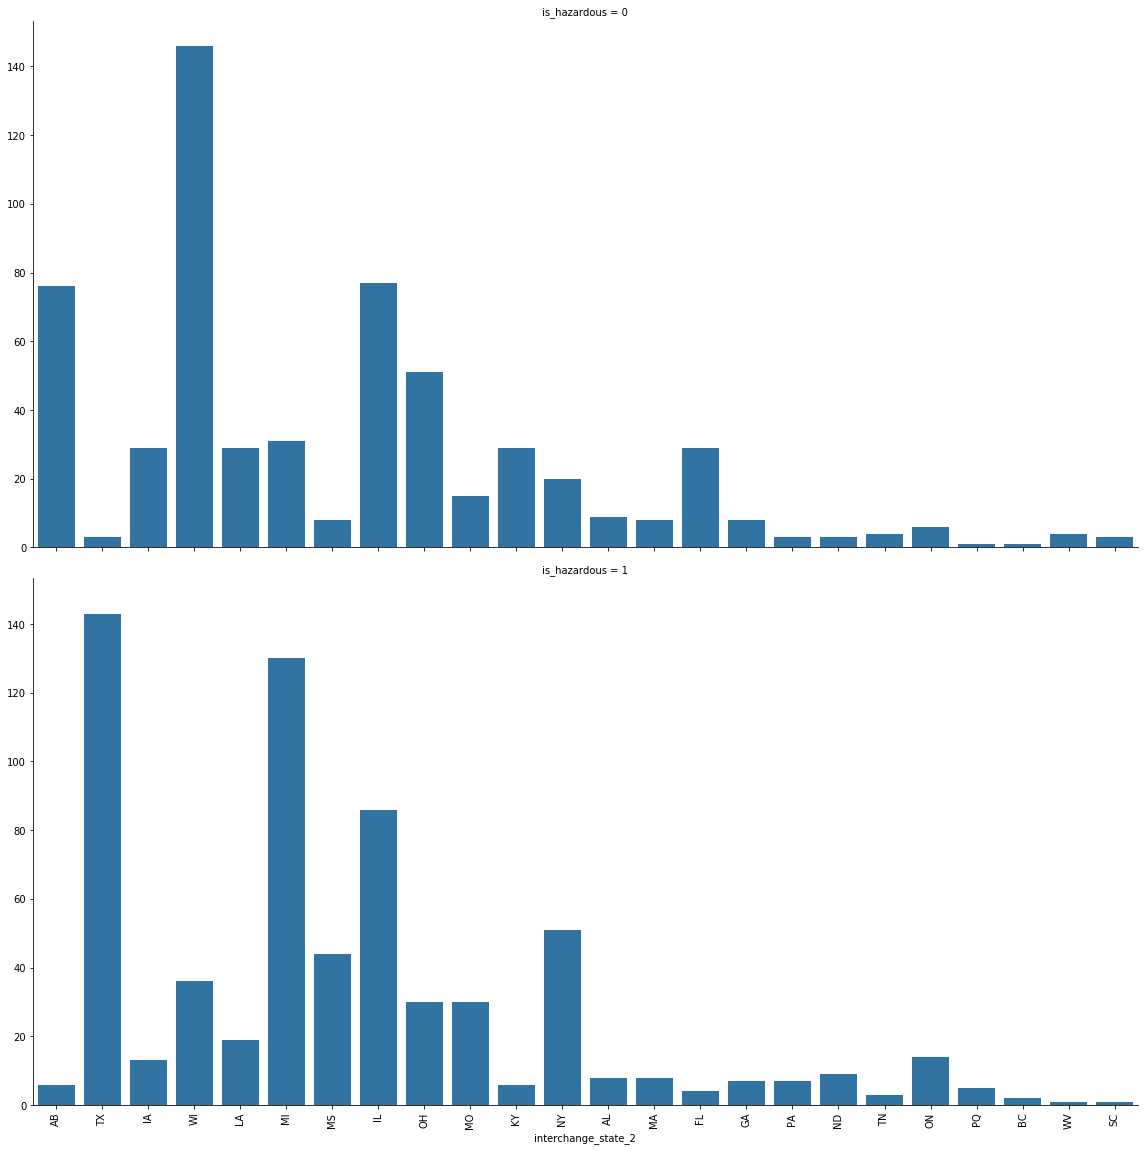

In [19]:
g = sns.FacetGrid(df, row='is_hazardous', height=8, aspect=2)
g.map(sns.countplot, 'interchange_state_2')
plt.xticks(rotation=90)

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

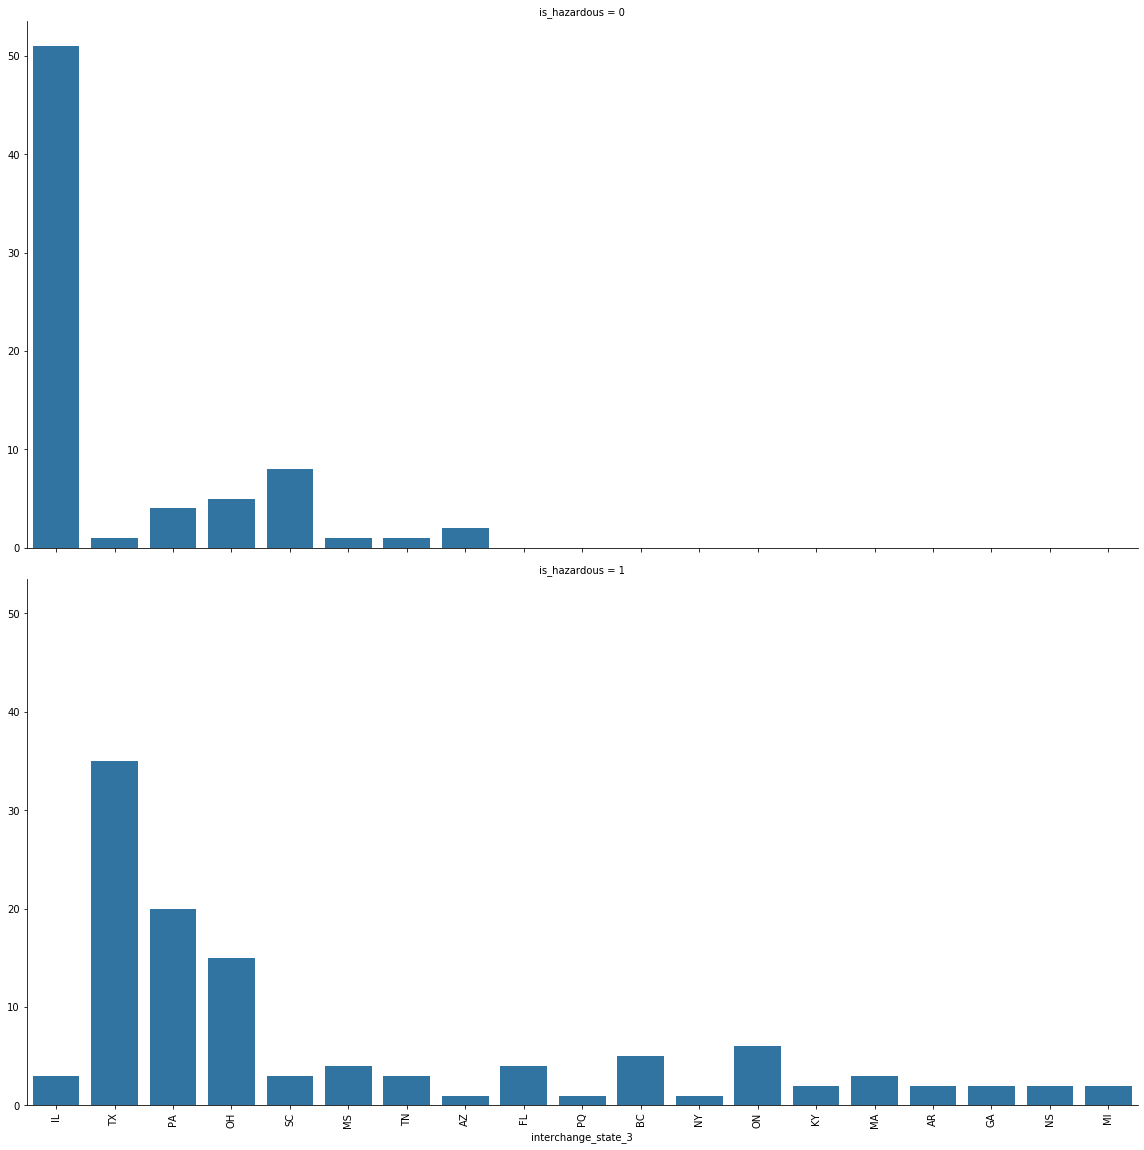

In [20]:
g = sns.FacetGrid(df, row='is_hazardous', height=8, aspect=2)
g.map(sns.countplot, 'interchange_state_3')
plt.xticks(rotation=90)

/Users/nastory/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

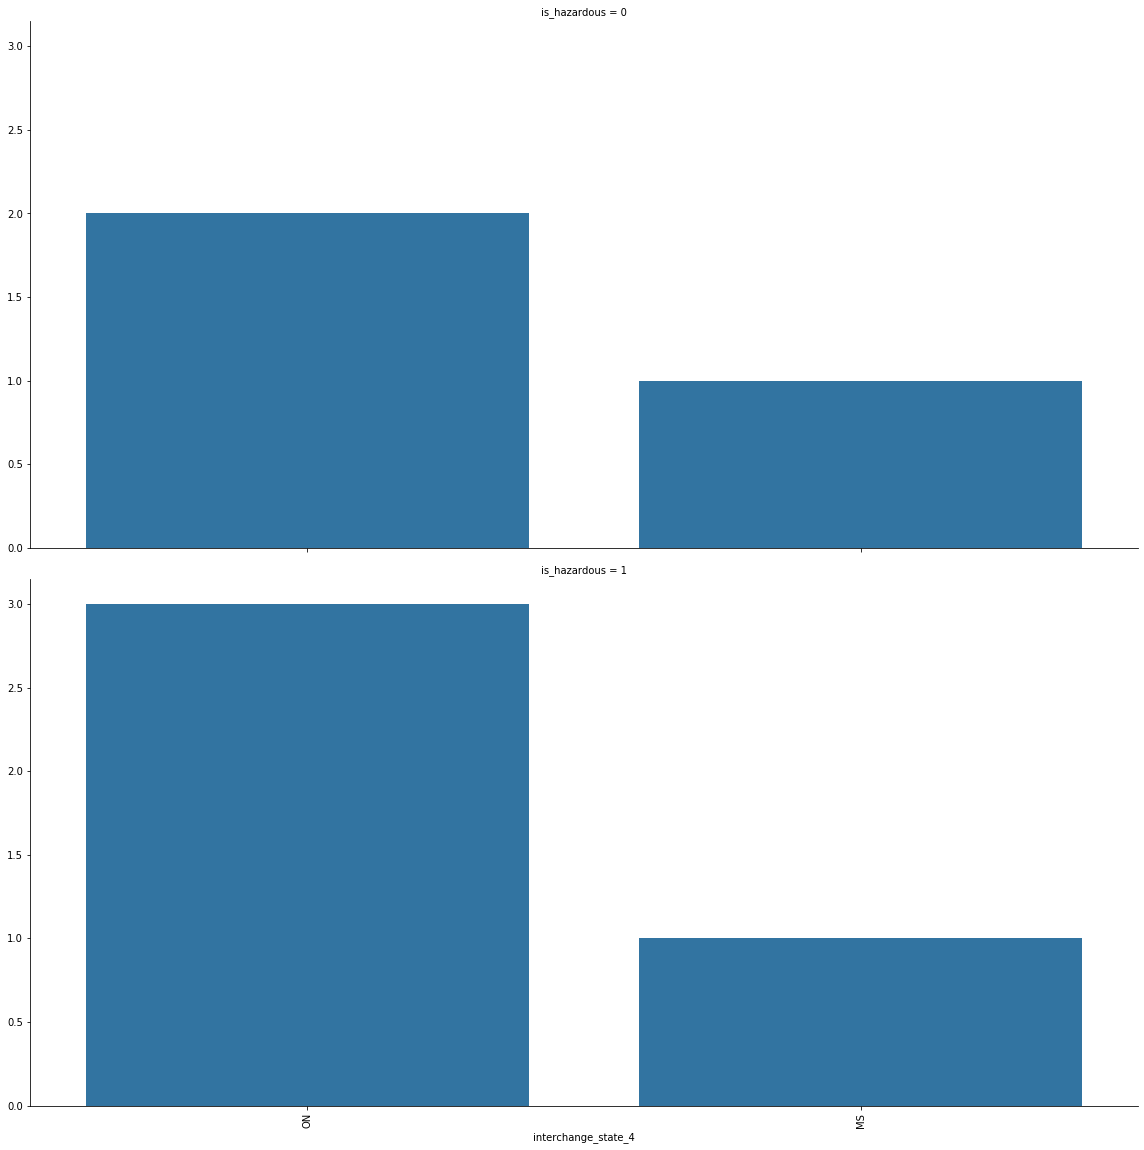

In [21]:
g = sns.FacetGrid(df, row='is_hazardous', height=8, aspect=2)
g.map(sns.countplot, 'interchange_state_4')
plt.xticks(rotation=90)

Very few shipments have more than 3 interchanges, so we will drop interchange states 4 and 5.

In [22]:
drop_cols.append('interchange_state_4')
drop_cols.append('interchange_state_5')

Let's execute our column drops and save the final data to a csv.

In [23]:
df.drop(drop_cols, axis=1, inplace=True)

In [24]:
df.to_csv('./waybill_relevant_data.csv', index=False)